In [73]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [74]:
!pip install transformers

In [75]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ProcessingData/vncorenlp(Phase2).csv')
len(data)

8093

In [76]:
data.info

<bound method DataFrame.info of       Unnamed: 0   No.                    Comment  Label
0              0     1                     đu v l      1
1              1     2  mấy favelas nhồng vãi lồn      1
2              2     3      liên_hoan xác_thịt: v      0
3              3     4   cá_rô_phi ghê vãi cả lồn      1
4              4     5          nip to vãi cả lồn      1
...          ...   ...                        ...    ...
8088        8088  8089     ruler bắn cháy vãi lồn      1
8089        8089  8090                 vãi 1 game      1
8090        8090  8091     999 lam may ac vãi lồn      1
8091        8091  8092                        NaN      0
8092        8092  8093                     t2 cay      0

[8093 rows x 4 columns]>

In [77]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=8)
len(train)

5665

In [78]:
len(test)

2428

In [79]:
val, test = train_test_split(test, test_size=2/3, random_state=8)
len(val)

809

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
val.to_csv('val.csv')

In [80]:
!pip install accelerate -U

In [81]:
!pip install transformers[torch]

In [82]:

from vncorenlp import VnCoreNLP

vncorenlp = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

In [83]:

#pre-process
import re
import numpy as np
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def preprocess(text, tokenized=True, lowercased=True):
    # text = ViTokenizer.tokenize(text)
    # text = ' '.join(vncorenlp.tokenize(text)[0])
    text = deEmojify(text)
    if tokenized:
        pre_text = ""
        sentences = vncorenlp.tokenize(text)
        for sentence in sentences:
            pre_text += " ".join(sentence)
        text = pre_text
    return text

def pre_process_features(X, y, tokenized=True, lowercased=True):
    X = [preprocess(str(p), tokenized=tokenized, lowercased=lowercased) for p in list(X)]
    for idx, ele in enumerate(X):
        if not ele:
            np.delete(X, idx)
            np.delete(y, idx)
    return X, y

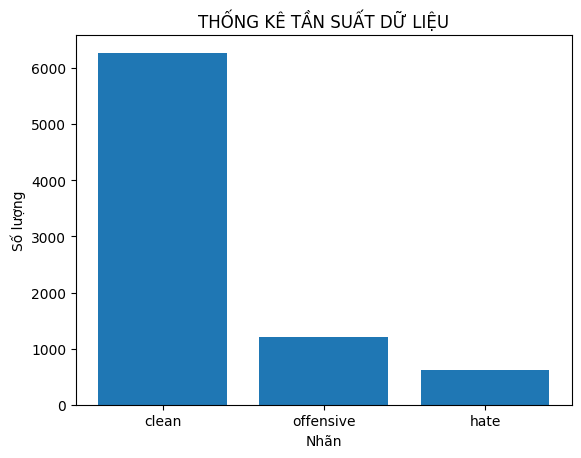

In [84]:
import matplotlib.pyplot as plt

labels = ['clean', 'offensive', 'hate']
counts = data['Label'].value_counts()
label_indices = [0, 1, 2]

# Tạo biểu đồ cột
plt.bar(label_indices, counts)

# Đặt nhãn trục x
plt.xticks(label_indices, labels)

# Tạo tiêu đề và nhãn trục
plt.title('THỐNG KÊ TẦN SUẤT DỮ LIỆU')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()

In [ ]:
print('sỐ LƯỢNG MỖI NHÃN: \n',counts)

sỐ LƯỢNG MỖI NHÃN: 
 0    6275
1    1207
2     611
Name: Label, dtype: int64


In [85]:
# X_train = train['Comment'].values.tolist()
# y_train = train['Label'].values.tolist()

# X_val = val['Comment'].values.tolist()
# y_val = val['Label'].values.tolist()

# X_test = test['Comment'].values.tolist()
# y_test = test['Label'].values.tolist()

X_train = train['Comment']
y_train = train['Label'].values

X_val = val['Comment']
y_val = val['Label'].values

X_test = test['Comment']
y_test = test['Label'].values

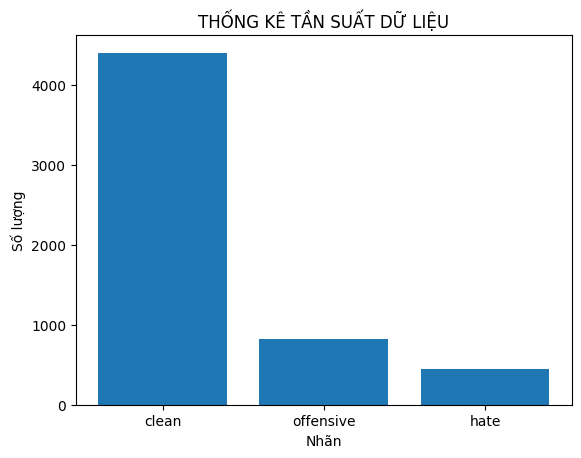

In [ ]:
import matplotlib.pyplot as plt

labels = ['clean', 'offensive', 'hate']
counts = train['Label'].value_counts()
label_indices = [0, 1, 2]

# Tạo biểu đồ cột
plt.bar(label_indices, counts)

# Đặt nhãn trục x
plt.xticks(label_indices, labels)

# Tạo tiêu đề và nhãn trục
plt.title('THỐNG KÊ TẦN SUẤT DỮ LIỆU TRAIN')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()

In [ ]:
print('sỐ LƯỢNG MỖI NHÃN: \n',counts)

sỐ LƯỢNG MỖI NHÃN: 
 0    4397
1     822
2     446
Name: Label, dtype: int64


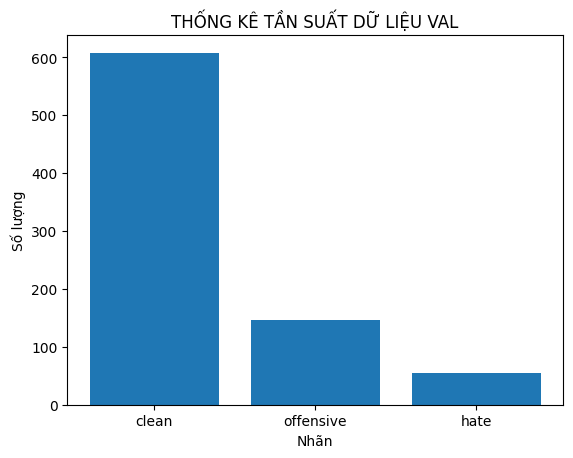

In [ ]:
import matplotlib.pyplot as plt

labels = ['clean', 'offensive', 'hate']
counts = val['Label'].value_counts()
label_indices = [0, 1, 2]

# Tạo biểu đồ cột
plt.bar(label_indices, counts)

# Đặt nhãn trục x
plt.xticks(label_indices, labels)

# Tạo tiêu đề và nhãn trục
plt.title('THỐNG KÊ TẦN SUẤT DỮ LIỆU VAL')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()

In [ ]:
print('sỐ LƯỢNG MỖI NHÃN: \n',counts)

sỐ LƯỢNG MỖI NHÃN: 
 0    608
1    147
2     54
Name: Label, dtype: int64


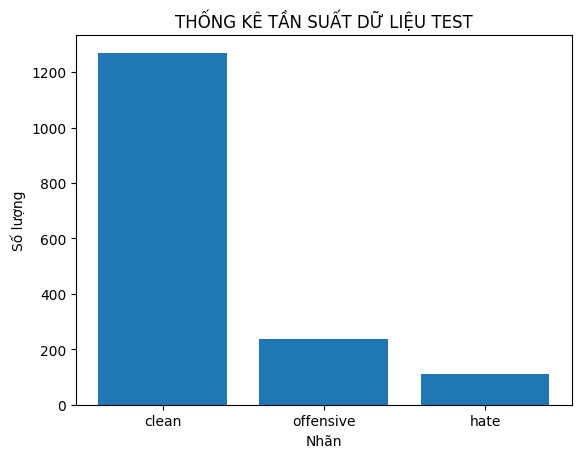

In [ ]:
import matplotlib.pyplot as plt

labels = ['clean', 'offensive', 'hate']
counts = test['Label'].value_counts()
label_indices = [0, 1, 2]

# Tạo biểu đồ cột
plt.bar(label_indices, counts)

# Đặt nhãn trục x
plt.xticks(label_indices, labels)

# Tạo tiêu đề và nhãn trục
plt.title('THỐNG KÊ TẦN SUẤT DỮ LIỆU TEST')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()

In [ ]:
print('sỐ LƯỢNG MỖI NHÃN: \n',counts)

sỐ LƯỢNG MỖI NHÃN: 
 0    1270
1     238
2     111
Name: Label, dtype: int64


In [86]:
train_X, train_y = pre_process_features(X_train, y_train, tokenized=True, lowercased = False)
dev_X, dev_y = pre_process_features(X_val, y_val, tokenized=True, lowercased = False)
test_X, test_y = pre_process_features(X_test, y_test, tokenized=True, lowercased = False)

In [87]:
# PhoBERT
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

model = AutoModelForSequenceClassification.from_pretrained("vinai/phobert-base", num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base",use_fast=False)

import torch

class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_encodings = tokenizer(train_X, truncation=True, padding=True, max_length=100)
dev_encodings = tokenizer(dev_X, truncation=True, padding=True, max_length=100)
test_encodings = tokenizer(test_X, truncation=True, padding=True, max_length=100)

train_dataset = BuildDataset(train_encodings, train_y)
dev_dataset = BuildDataset(dev_encodings, dev_y)
test_dataset = BuildDataset(test_encodings, test_y)

training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/Colab Notebooks/phobert-base-v2-output-20ep',
    num_train_epochs=20,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    no_cuda=False,
    do_eval=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=dev_dataset
)

trainer.train()
trainer.save_model("/content/drive/MyDrive/Colab Notebooks/phobert-base-v2-model-20ep")

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['

Step,Training Loss
500,0.488400
1000,0.140900
1500,0.034900


In [88]:
test_dataset.__getitem__(1)

{'input_ids': tensor([    0,  4219,   849,  1339,  2926,   136,  1163,  1818,  2765,  2926,
           740,    57, 13234,  3078,   957,     2,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'labels': tensor(2)}

[[1219   28   23]
 [  39  178   21]
 [  35   24   52]]
F1 - micro: 0.8949969116738727
F1 - macro: 0.738109416034402


<Axes: >

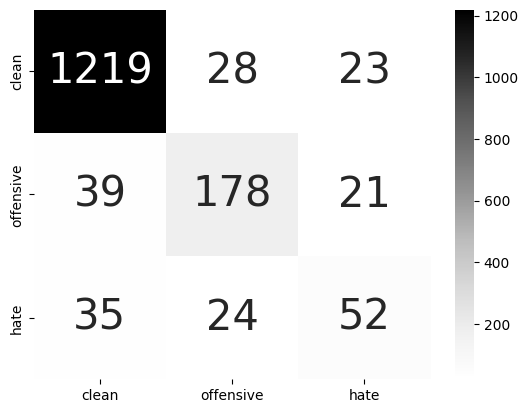

In [89]:
y_pred_classify = trainer.predict(test_dataset)

y_pred = np.argmax(y_pred_classify.predictions, axis=-1)
y_true = test_y

cf1 = confusion_matrix(y_true, y_pred)
print(cf1)

evaluation = f1_score(y_true, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(y_true, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

# Show out the confusion matrix
df_cm1 = pd.DataFrame(cf1, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})

In [ ]:
df=[]
for i in (test[]):
  if y_pred[i]!=y_test[i]:
    df.append(i)
    df.append(y_pred[i])

In [ ]:
X_test[14]

'2 subs bảo sấp mặt lờ'